### Ford GoBike System Data Exploration

*An investigation of individual rides made in a bike-sharing system covering the greater San Francisco Bay Area by James Bimler*

### Investigation Overview

This presentation presents my conclusions regarding three observations from the Ford GoBike dataset, provided by Udacity. These areas are:

* Univariate Exploration taking a look at ride duration and user type and day of the week
* Bivariate Exploration looking at ride duration, user type, start hour and ride duration
* Multivariate Exploration looking at subscriber vs customer differences

In [4]:
# import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load dataset
df = pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

### Most trips taken in terms of day of the week
> The day the service sees the most usage is Thursday followed by Tuesday.

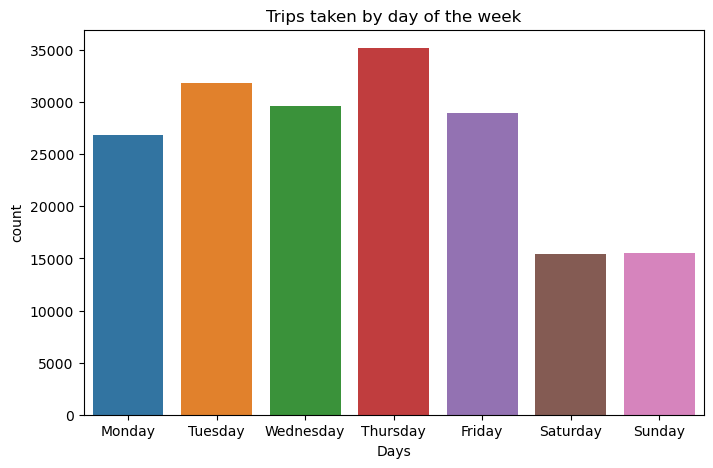

In [13]:
# Get the count of trips made on each day of the week 
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 

# Plot distribution of day of the week 
plt.figure(figsize=[8, 5]) 
sns.countplot(data=df, x='day_of_week', order=weekday) 
plt.title('Trips taken by day of the week') 
plt.xlabel('Days') 
plt.show()

### Trips taken by time of the day
> The majority of trips are taken in the morning and afternoon.

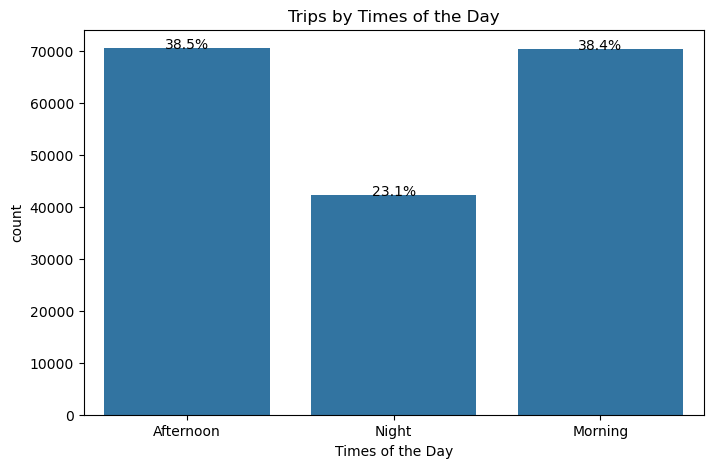

In [11]:
# Plot distribution of day of week 
plt.figure(figsize=[8, 5]) 
base_color = sns.color_palette()[0] 
sns.countplot(data=df, x='time_of_day', color=base_color) 
n_points = df.shape[0] 
user_counts = df['time_of_day'].value_counts() 
locs, labels = plt.xticks() 

# Print frequency on the bar chart 
for loc, label in zip(locs, labels): 
    count = user_counts[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100 * count / n_points) 
    plt.text(loc, count - 8, pct_string, ha='center') 
plt.title('Trips by Times of the Day') 
plt.xlabel('Times of the Day') 
plt.show() 

### Correlation between start_hour, duration_min, and member_birth_year
> Younger riders tend to use the service for longer durations

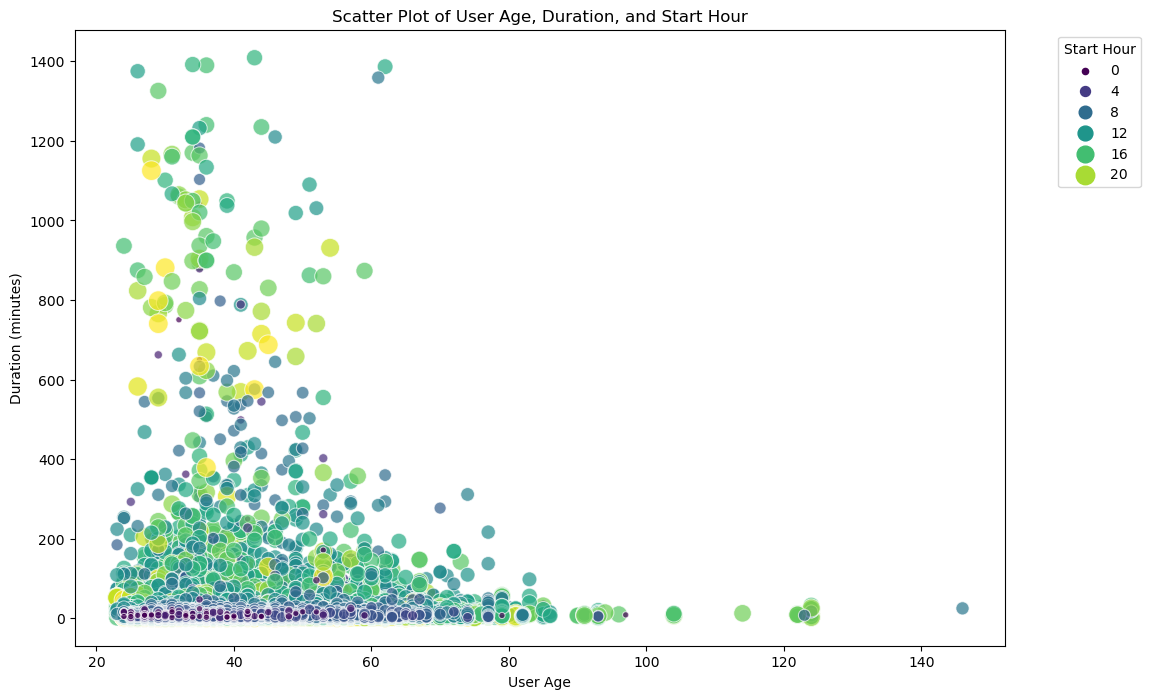

In [16]:
# Calculate user age 
df['user_age'] = 2024 - df['member_birth_year'] 

# Create a scatter plot with 9 boxes 
plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='user_age', y='duration_min', hue='start_hour', palette='viridis', data=df, alpha=0.7, size='start_hour', sizes=(20, 200)) 
plt.title('Scatter Plot of User Age, Duration, and Start Hour') 
plt.xlabel('User Age') 
plt.ylabel('Duration (minutes)') 
plt.legend(title='Start Hour', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show() 

### Subscribers vs Customer base
> Showing the difference in how user types vary based on start times

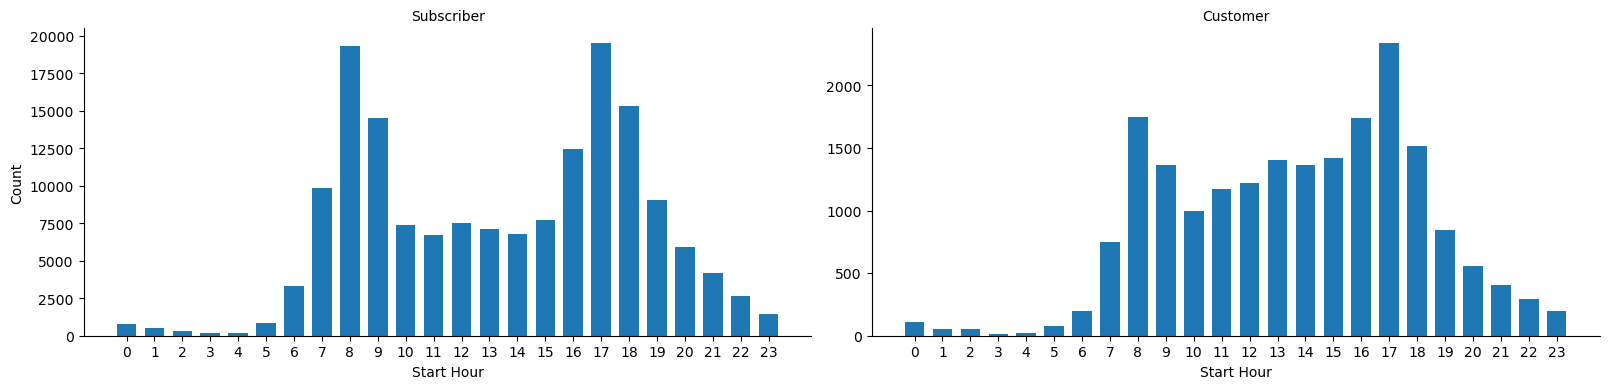

In [17]:
# Define order of user categories 
user_cat_order = df['user_type'].value_counts().index 

# Set up bin edges and create FacetGrid 
bin_edges = np.arange(-0.5, 23.5+1, 1) 
g = sns.FacetGrid(data=df, col='user_type', height=4, aspect=2, col_order=user_cat_order, sharey=False) 

# Map histograms to the grid 
g.map(plt.hist, 'start_hour', bins=bin_edges, rwidth=0.7) 

# Set labels and ticks 
g.set_axis_labels('Start Hour', 'Count') 
g.set_titles(col_template='{col_name}') 

# Adjust x-axis ticks 
g.set(xticks=np.arange(0, 23+1, 1)) 

# Display the plot 
plt.show() 